In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 0.24.2
numpy version: 1.16.4
seaborn version: 0.9.0


In [3]:
url='https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-adjusted-index.csv'
df=pd.read_csv(url, parse_dates=['date'])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.011,0.475,0.850,0.906,0.946
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.117,-0.181,0.027,0.059,0.081
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.485,0.823,1.286,1.356,1.405
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.087,-0.202,0.000,0.031,0.052
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.244,-0.087,0.145,0.180,0.204


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 14 columns):
date             591 non-null datetime64[ns]
iso_a3           591 non-null object
currency_code    591 non-null object
name             591 non-null object
local_price      591 non-null float64
dollar_ex        591 non-null float64
dollar_price     591 non-null float64
GDP_dollar       591 non-null float64
adj_price        591 non-null float64
USD              591 non-null float64
EUR              591 non-null float64
GBP              591 non-null float64
JPY              591 non-null float64
CNY              591 non-null float64
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 64.7+ KB


In [5]:
df=df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.419,-0.434,-0.338,-0.261,-0.396
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.192,-0.213,-0.080,0.028,-0.160
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.406,0.370,0.601,0.789,0.463
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.122,-0.145,0.000,0.117,-0.087
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.040,0.013,0.185,0.323,0.082


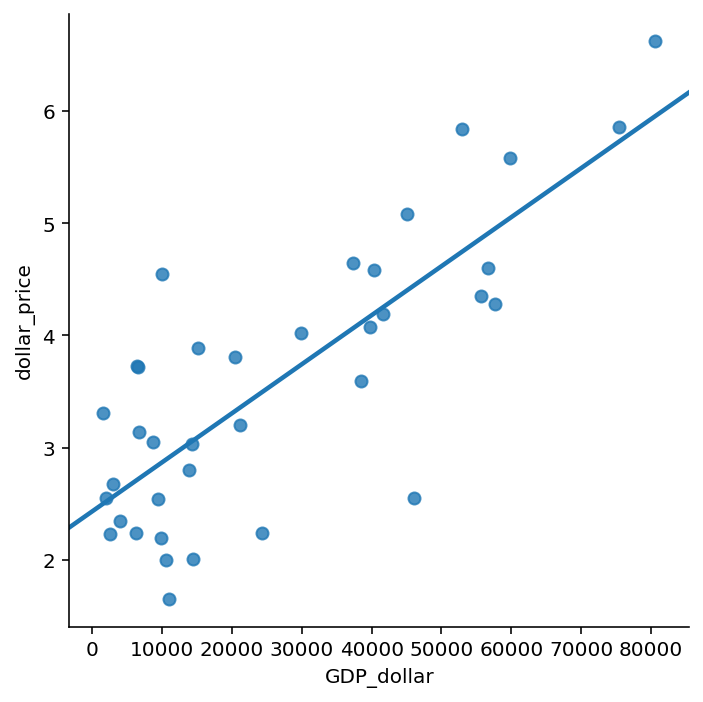

In [6]:
sns.lmplot(x='GDP_dollar', y='dollar_price', data=df, ci=None)

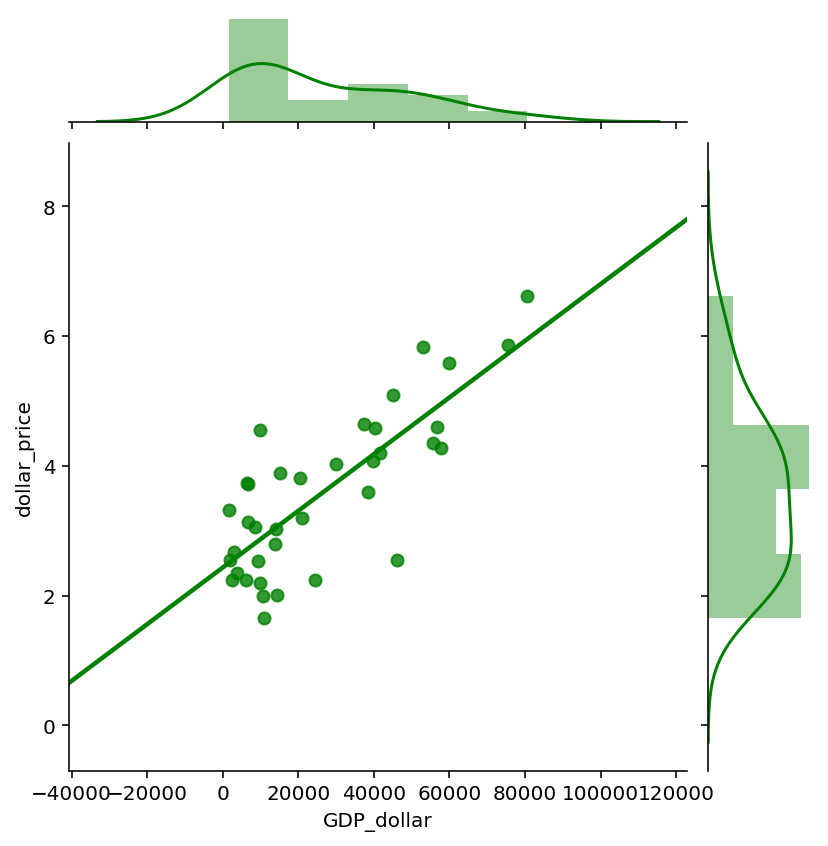

In [7]:
sns.jointplot(x='GDP_dollar', y='dollar_price', data=df, kind='reg', ci=None, color='green');

In [8]:
import sklearn
from sklearn.linear_model import LinearRegression

In [9]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.21.2


In [10]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
X=df[['GDP_dollar']]
y=df.dollar_price

In [12]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.score(X,y)

0.6312750690042251

In [14]:
model.intercept_

2.432727161471293

In [15]:
model.coef_

array([4.36961383e-05])

In [16]:
model.intercept_ + model.coef_ * 9000

array([2.82599241])

In [17]:
model.predict([[9000]])

array([2.82599241])

In [18]:
model.predict([[9000], 
               [40000]])

array([2.82599241, 4.18057269])

In [19]:
np.arange(5000, 50001, 2500)

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [20]:
np.linspace(5000, 50001, 20).reshape(-1, 1)

array([[ 5000.        ],
       [ 7368.47368421],
       [ 9736.94736842],
       [12105.42105263],
       [14473.89473684],
       [16842.36842105],
       [19210.84210526],
       [21579.31578947],
       [23947.78947368],
       [26316.26315789],
       [28684.73684211],
       [31053.21052632],
       [33421.68421053],
       [35790.15789474],
       [38158.63157895],
       [40527.10526316],
       [42895.57894737],
       [45264.05263158],
       [47632.52631579],
       [50001.        ]])

In [21]:
model.predict(np.linspace(5000, 50001, 20).reshape(-1, 1))

array([2.65120785, 2.75470101, 2.85819416, 2.96168731, 3.06518047,
       3.16867362, 3.27216677, 3.37565993, 3.47915308, 3.58264624,
       3.68613939, 3.78963254, 3.8931257 , 3.99661885, 4.100112  ,
       4.20360516, 4.30709831, 4.41059146, 4.51408462, 4.61757777])

In [22]:
s=pd.Series(np.linspace(5000, 50001, 20))
s

0      5000.000000
1      7368.473684
2      9736.947368
3     12105.421053
4     14473.894737
5     16842.368421
6     19210.842105
7     21579.315789
8     23947.789474
9     26316.263158
10    28684.736842
11    31053.210526
12    33421.684211
13    35790.157895
14    38158.631579
15    40527.105263
16    42895.578947
17    45264.052632
18    47632.526316
19    50001.000000
dtype: float64

In [23]:
model.predict(s.to_frame())

array([2.65120785, 2.75470101, 2.85819416, 2.96168731, 3.06518047,
       3.16867362, 3.27216677, 3.37565993, 3.47915308, 3.58264624,
       3.68613939, 3.78963254, 3.8931257 , 3.99661885, 4.100112  ,
       4.20360516, 4.30709831, 4.41059146, 4.51408462, 4.61757777])

In [24]:
dx=pd.DataFrame(np.linspace(5000, 50001, 20), columns=['gdp'])
dx

,gdp
0,5000.000000
1,7368.473684
2,9736.947368
3,12105.421053
4,14473.894737
5,16842.368421
6,19210.842105
7,21579.315789
8,23947.789474
9,26316.263158


In [25]:
model.predict(dx)

array([2.65120785, 2.75470101, 2.85819416, 2.96168731, 3.06518047,
       3.16867362, 3.27216677, 3.37565993, 3.47915308, 3.58264624,
       3.68613939, 3.78963254, 3.8931257 , 3.99661885, 4.100112  ,
       4.20360516, 4.30709831, 4.41059146, 4.51408462, 4.61757777])

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
model_a = smf.ols(formula='dollar_price ~ GDP_dollar', data=df).fit()

In [28]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.92
Date:                Mon, 24 Jun 2019   Prob (F-statistic):           4.34e-09
Time:                        13:25:10   Log-Likelihood:                -41.445
No. Observations:                  37   AIC:                             86.89
Df Residuals:                      35   BIC:                             90.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4327      0.195     12.479      0.0

In [29]:
model_a.pvalues

Intercept     1.915703e-14
GDP_dollar    4.338811e-09
dtype: float64

In [30]:
model.intercept_

2.432727161471293

In [31]:
model.coef_

array([4.36961383e-05])

In [34]:
print(f'{model.coef_[0]:.7f}')

IndexError: index 1 is out of bounds for axis 0 with size 1